In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.models import load_model
import pickle
from sklearn.decomposition import PCA

In [ ]:
#x = pd.read_csv(r'D:\NSP ML\New folder\New folder\PREMATRIC-MODEL-python.csv')
G = pd.read_csv(r'D:\NSP ML\New folder\New folder\PREMATRIC-MODEL-python-FINAL.csv',parse_dates=['updated_dt','password_last_updated_on'], dayfirst=True)
G.shape

In [ ]:
G.dtypes

In [ ]:
#G['Expr1'] = G['Expr1'].astype('object')
G['c_institution_id'] = G['c_institution_id'].astype('object')

In [ ]:
G = G.drop_duplicates()
G.shape

In [ ]:
G.iloc[:,0:10].isnull().sum()

In [ ]:
G = G[G['c_institution_id']!=0].reset_index(drop=True)
G.shape

In [ ]:
values = {'max_application_level':0, 'min_application_level':0,
       'avg_application_level':0, 'median_as_application_level':0,
       'max_annual_family_income':0, 'min_annual_family_income':0,
       'avg_annual_family_income':0, 'median_annual_family_income':0,
       'Percent_Inrank':0, 'sunday':0, 'average_of_verification_time':0, 'ZERO':0,
       'average_scholarship_amount':0, 'R1':0, 'R2':0, 'R3':0, 'R4':0, 'R5':0, 'R6':0, 'R7':0,
       'R8':0, 'M':0, 'F':0, 'T':0, 'CountOfIp Address':0, 'count(ACCEPTED_BY_PFMS)':0,
       'count(NEW)':0, 'count(REJECTED_BY_PFMS)':0, 'count (HOSTELLER_TRUE)':0,
       'count(PAYMENT_STATUS_ACCP)':0, 'count AADHAAR_REG_MODE':0, 'less_than_3':0,
       '4':0, '5':0, '6':0, '7':0, '8':0, '9':0, '10':0, '11':0, '12':0, '13':0, '14':0, '15':0, '16':0,
       '17':0, '18':0, '19':0, '20':0, '21':0, '22':0, '23':0, '24':0, '25':0, '26':0, '27':0, '28':0,
       '29':0, '30':0, 'above_30':0, 'SC':0, 'ST':0, 'OBC':0, 'rural_urban':'NNA', 'boys_girls':'NNA',
       'board_org_not_mapped':'NNA', 'registration_status':'NNA',
       'mhrd_flag':'NNA', 'is_contact_updated':'NNA',
       'is_validated_mobileno':'NNA', 'is_password_changed':'NNA',
       'is_first_login':'NNA', 'is_NNAmedies_change':'NNA', 'is_valid_institute':'NNA'}
X_T = G.drop(columns=['PREPOST','count_of_application_id', 'count_of_in_rank','schlorcolg','MaxOfAc Year','is_contact_updated'])
#print(X_T.shape)
X_T = X_T.fillna(value=values)

In [ ]:
X_T.iloc[:,60:].isnull().sum()

In [ ]:
X_T.iloc[:,60:].dtypes

In [ ]:
result=[]
for v in X_T['updated_dt']:
    if pd.isna(v):
        result.append(0)
    else:
        v= (v- np.datetime64('1900-01-01')).days+2
        result.append(v)
X_T["updated_dt"] = result   
result=[]
for v in X_T['password_last_updated_on']:
    if pd.isna(v):
        result.append(0)
    else:
        v= (v- np.datetime64('1900-01-01')).days+2
        result.append(v)
X_T["password_last_updated_on"] = result

In [ ]:
X_T.shape

In [ ]:
X_T.iloc[:,60:].isnull().sum()

In [ ]:
X_T = X_T.drop(columns=['Expr1','c_institution_id'])
X_T = pd.get_dummies(X_T)
print(X_T.shape)

In [ ]:
from sklearn import preprocessing
X_T = preprocessing.scale(X_T)
print(X_T.shape)

In [ ]:
X_T = pd.DataFrame(X_T)
X_T.shape

In [ ]:
pca = PCA(0.9).fit(X_T)
X_pca  = pca.transform(X_T)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca['Expr1'] = G['Expr1']
X_pca['c_institution_id'] = G['c_institution_id']
X_pca.head()

In [ ]:
#Under Sampling
#a = d1[d1['Fake']==1] 
d2 = X_pca.sample(frac=0.7, replace=False, random_state=3)
#d2 = d1[d1['Fake']==0].append(a, ignore_index=True)
d2['Expr1'].value_counts()

In [35]:
d2=X_pca

In [14]:
a = d2[d2['Expr1']==1]
a.shape

(1351, 47)

In [15]:
a=d2[d2['Expr1']==1]
while len(a)<70000:
    a=a.append(a)
a.shape

(86464, 47)

In [16]:
a['Expr1'].value_counts()

1    86464
Name: Expr1, dtype: int64

In [233]:
d2=d2.append(a)
d2.shape

(249279, 47)

In [17]:
d2['Expr1'].value_counts()

0    161464
1      1351
Name: Expr1, dtype: int64

In [18]:
d2.shape

(162815, 47)

In [81]:
d3 = X_pca[~X_pca['c_institution_id'].isin(d2['c_institution_id'])]

In [82]:
d3.shape

(69778, 47)

In [83]:
161464+69778+1351

232593

In [84]:
d3['Expr1'].value_counts()

0    69151
1      627
Name: Expr1, dtype: int64

In [163]:
1351/161464

0.008367190209582322

In [164]:
627/69151

0.009067113996905324

Text(0, 0.5, 'Second Principal Component')

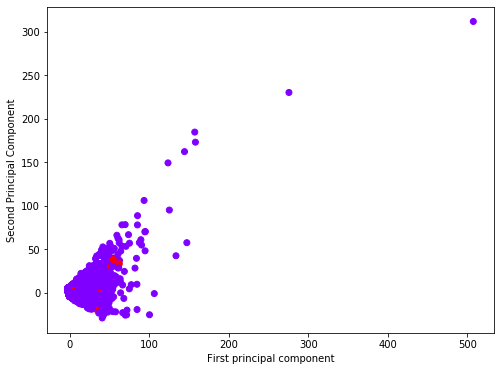

In [85]:
#x_pca = pca.transform(X)
plt.figure(figsize=(8,6))
plt.scatter(d2[0],d2[1],c=d2['Expr1'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

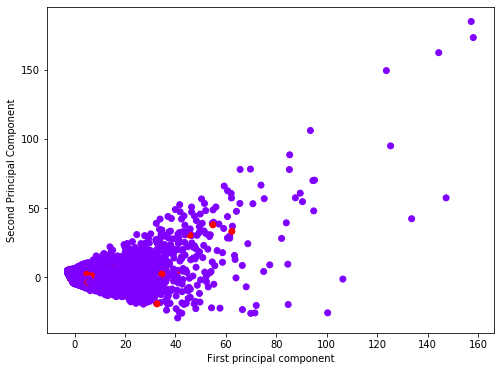

In [86]:
#Remove outliers
x_pca_df = d2[d2[0]<200]
#x_pca_df = x_pca_df[x_pca_df[1]<50000]
x_pca_df.shape
plt.figure(figsize=(8,6))
plt.scatter(x_pca_df[0],x_pca_df[1],c=x_pca_df['Expr1'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [87]:
x_pca_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,Expr1
0,1.000000,-0.095796,-0.035111,-0.033138,0.004660,0.004137,0.032686,-0.111856,-0.018342,-0.042145,...,0.007877,0.008257,0.012452,-0.030499,0.002206,0.002712,-0.015143,0.002934,-0.005605,-0.003786
1,-0.095796,1.000000,-0.039811,-0.040775,-0.004942,0.002544,0.029558,-0.126807,-0.025879,-0.022992,...,0.003682,0.005805,0.004401,-0.025947,0.008825,0.006914,-0.027689,0.009132,0.003490,0.040553
2,-0.035111,-0.039811,1.000000,-0.015662,-0.004273,0.000190,0.011659,-0.057235,-0.011547,-0.005783,...,0.001468,0.000765,-0.001368,-0.013067,-0.002710,0.005421,-0.014713,0.003588,0.004391,-0.005368
3,-0.033138,-0.040775,-0.015662,1.000000,-0.001757,-0.003746,0.019124,-0.056314,-0.010958,0.001650,...,-0.000586,0.002631,-0.006855,-0.006344,0.010616,0.007536,-0.012816,0.005102,0.004593,-0.050448
4,0.004660,-0.004942,-0.004273,-0.001757,1.000000,-0.000516,0.008059,-0.013751,-0.001376,0.012534,...,0.001147,-0.000848,-0.010059,0.010147,0.012006,0.003894,-0.000506,0.001702,0.006018,-0.026064
5,0.004137,0.002544,0.000190,-0.003746,-0.000516,1.000000,-0.004460,-0.009366,-0.000676,0.001014,...,-0.002341,-0.001227,0.002073,0.001655,-0.008174,-0.001132,-0.001321,0.002119,0.004470,0.038762
6,0.032686,0.029558,0.011659,0.019124,0.008059,-0.004460,1.000000,0.012441,-0.003833,-0.024867,...,0.002569,-0.016664,0.032886,-0.025903,-0.082717,-0.043584,0.010842,0.005171,-0.008807,-0.025357
7,-0.111856,-0.126807,-0.057235,-0.056314,-0.013751,-0.009366,0.012441,1.000000,-0.033614,-0.013264,...,0.011603,-0.007621,0.003595,-0.019783,-0.028370,-0.000628,-0.033278,0.009421,0.025362,-0.005889
8,-0.018342,-0.025879,-0.011547,-0.010958,-0.001376,-0.000676,-0.003833,-0.033614,1.000000,-0.001126,...,-0.003640,-0.009436,0.007889,-0.009094,-0.018650,0.002440,-0.007473,0.005279,0.010202,0.011408
9,-0.042145,-0.022992,-0.005783,0.001650,0.012534,0.001014,-0.024867,-0.013264,-0.001126,1.000000,...,0.005433,0.000452,0.030700,-0.032292,-0.050006,-0.027097,-0.002875,0.000454,-0.019685,0.000572


In [88]:
x_pca_df.shape

(162813, 47)

In [63]:
d2.shape

(162815, 47)

In [155]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1'].astype('int')
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [156]:
Y_test.value_counts()

0    40359
1      345
Name: Expr1, dtype: int64

In [157]:
X.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='object')

In [66]:
from sklearn.model_selection import KFold

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [159]:
X.shape


(162813, 45)

In [31]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline,X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))
#lr_classifier = LogisticRegression(random_state = 0)
#scores = cross_val_score(lr_classifier, X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1) 
#Y_pred = lr_classifier.predict(X_test)
#cm = confusion_matrix(Y_test, Y_pred)
#print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
#print(cm)
print(scores)

[0.02516175 0.02270346 0.02118644 0.02528576 0.0256593  0.02389573
 0.0237931  0.02152778 0.02514845 0.02403021 0.02375215 0.02705628
 0.02532963 0.02493075 0.02398854 0.02399713 0.02486486 0.0227758
 0.02115319 0.02039452 0.02284898 0.02444062 0.02253726 0.02212079
 0.02373581 0.02503429 0.02369838 0.0253073  0.02579979 0.02328767]


In [160]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
print(cm)

Accuracy = 99.12%
[[40335    24]
 [  334    11]]


In [ ]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
steps = [('over', SMOTE()), ('model', SVC(kernel = 'linear', random_state = 0))]
pipeline = Pipeline(steps=steps)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline,X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))
#lr_classifier = LogisticRegression(random_state = 0)
#scores = cross_val_score(lr_classifier, X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1) 
#Y_pred = lr_classifier.predict(X_test)
#cm = confusion_matrix(Y_test, Y_pred)
#print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
#print(cm)
print(scores)

In [110]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc2_classifier = SVC(kernel = 'rbf', random_state = 0)
svc2_classifier.fit(X_train, Y_train)
Y_pred = svc2_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
print(cm)

Accuracy = 99.2%
[[14420     0]
 [  117     0]]


In [111]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
ga_classifier = GaussianNB()
ga_classifier.fit(X_train, Y_train)
Y_pred = ga_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
print(cm)

Accuracy = 95.55%
[[13862   558]
 [   89    28]]


In [112]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, Y_train)
Y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
print(cm)

Accuracy = 98.2%
[[14257   163]
 [   99    18]]


In [530]:
train_scores = []
test_scores = []
values = [i for i in range(1, 21)]
for i in values:
	# configure the model
	dt_model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	dt_model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = dt_model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = dt_model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.925, test: 0.919
>2, train: 0.925, test: 0.919
>3, train: 0.925, test: 0.919
>4, train: 0.927, test: 0.920
>5, train: 0.929, test: 0.919
>6, train: 0.931, test: 0.917
>7, train: 0.932, test: 0.916
>8, train: 0.938, test: 0.909
>9, train: 0.941, test: 0.904
>10, train: 0.947, test: 0.906
>11, train: 0.952, test: 0.903
>12, train: 0.956, test: 0.898
>13, train: 0.964, test: 0.888
>14, train: 0.971, test: 0.895
>15, train: 0.977, test: 0.892
>16, train: 0.982, test: 0.885
>17, train: 0.986, test: 0.884
>18, train: 0.988, test: 0.879
>19, train: 0.991, test: 0.876
>20, train: 0.992, test: 0.874


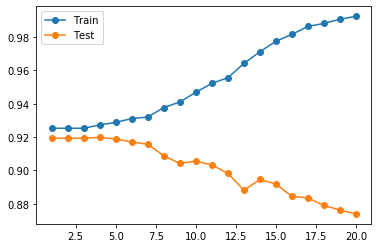

In [531]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [36]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
print('Precision = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
print(cm)

Accuracy = 99.13%
Precision = 0.02%
[[40342    17]
 [  336     9]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
#Using Logistic Regression Algorithm to the Training Set
steps = [('over', SMOTE()), ('model', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))]
pipeline = Pipeline(steps=steps)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline,X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))
#lr_classifier = LogisticRegression(random_state = 0)
#scores = cross_val_score(lr_classifier, X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1) 
#Y_pred = lr_classifier.predict(X_test)
#cm = confusion_matrix(Y_test, Y_pred)
#print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
#print(cm)
print(scores)

[0.08333333 0.08823529 0.08666667 0.11111111 0.11965812 0.09219858
 0.07189542 0.06521739 0.10204082 0.10897436 0.13207547 0.11392405
 0.06081081 0.10526316 0.10884354 0.08805031 0.06766917 0.07746479
 0.08383234 0.08333333 0.17021277 0.11724138 0.109375   0.0915493
 0.09411765 0.056      0.07042254 0.08130081 0.0867052  0.0729927 ]


In [ ]:
steps = [('over', SMOTE()), ('model', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))]
pipeline = Pipeline(steps=steps)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline,X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))
#lr_classifier = LogisticRegression(random_state = 0)
#scores = cross_val_score(lr_classifier, X_train, Y_train, scoring='precision', cv=cv, n_jobs=-1) 
#Y_pred = lr_classifier.predict(X_test)
#cm = confusion_matrix(Y_test, Y_pred)
#print('Accuracy = '+str(round(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])*100),2))+'%')
#print('TPR = '+str(round(((cm[1][1])/(cm[0][0]+cm[1][1])*100),2))+'%')
#print('FPR = '+str(round(((cm[0][1])/(cm[0][1]+cm[1][1])*100),2))+'%')
#print(cm)
print(scores)

In [580]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

X_train = pd.concat([X_train, Y_train], axis = 1)
X_test = pd.concat([X_test, Y_test], axis = 1)

X_rf = pd.concat([X_train, X_test])
y_rf = X_rf.pop('Fake')

#The stratify parameter will keep the distribution of y_rf as in y
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
     X_rf, y_rf, test_size=0.33, random_state=42, stratify = y_rf)

train_scores = []
test_scores = []
values = [i for i in range(1, 21)]
for i in values:
	# configure the model
	rf_model = RandomForestClassifier(max_depth=i, random_state=0)
	# fit model on the training dataset
	rf_model.fit(X_rf_train, y_rf_train)
	# evaluate on the train dataset
	train_yhat = rf_model.predict(X_rf_train)
	train_acc = accuracy_score(y_rf_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = rf_model.predict(X_rf_test)
	test_acc = accuracy_score( y_rf_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_rf_train, y_rf_train)
cm = confusion_matrix( y_rf_test, test_yhat)
print(cm)
print("Score of the classifier with random train/test split:    ", model.score(X_rf_test.values, y_rf_test.values))



>1, train: 0.924, test: 0.924
>2, train: 0.924, test: 0.924
>3, train: 0.924, test: 0.924
>4, train: 0.924, test: 0.924
>5, train: 0.925, test: 0.925
>6, train: 0.931, test: 0.923
>7, train: 0.936, test: 0.924
>8, train: 0.942, test: 0.923
>9, train: 0.947, test: 0.924
>10, train: 0.949, test: 0.924
>11, train: 0.953, test: 0.924
>12, train: 0.958, test: 0.922
>13, train: 0.963, test: 0.921
>14, train: 0.970, test: 0.922
>15, train: 0.980, test: 0.921
>16, train: 0.986, test: 0.920
>17, train: 0.992, test: 0.920
>18, train: 0.996, test: 0.920
>19, train: 0.997, test: 0.917
>20, train: 0.998, test: 0.917
[[2620   41]
 [ 197   22]]
Score of the classifier with random train/test split:     0.9201388888888888


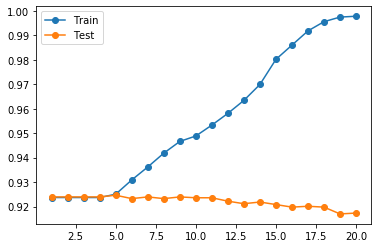

In [581]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [584]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Random Forest: f1=0.156 auc=0.250


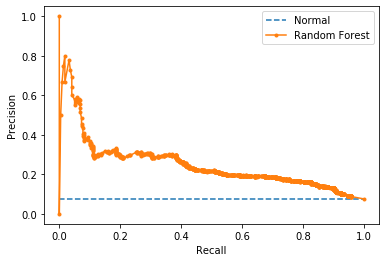

In [585]:
lr_probs = rf_model.predict_proba(X_rf_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = rf_model.predict(X_rf_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_rf_test, lr_probs)
lr_f1, lr_auc = f1_score(y_rf_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_rf_test[y_rf_test==1]) / len(y_rf_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Normal')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [586]:
y_rf_test.value_counts()

0    2661
1     219
Name: Fake, dtype: int64

In [587]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
# define the model
adb_model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=100, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
adb_model.fit(X_train, Y_train)
Y_pred = adb_model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

Accuracy: 0.920 (0.016)


array([[1979,   27],
       [ 167,    9]], dtype=int64)

In [588]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [589]:
#rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, Y_train)
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   59.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  3.3min finished


Train Accuracy - : 0.926
Test Accuracy - : 0.919


NotFake: ROC AUC=0.500
Random Forest: ROC AUC=0.798


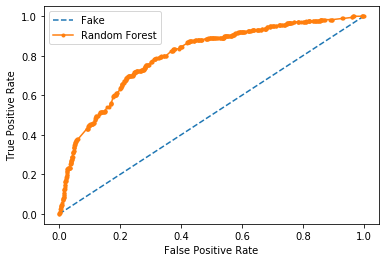

In [590]:
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(Y_test))]
    # predict probabilities
    lr_probs = rf_Grid.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('NotFake: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Fake')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [114]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense


In [115]:
x_pca_df.shape

(58147, 27)

In [37]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1']
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [38]:
X_train.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='object')

In [715]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

ann_classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 5],
           'epochs': [100, 120],
           'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                        param_grid = parameters,
                        scoring = 'accuracy',
                        cv = 10)
grid_search = grid_search.fit(X_train, Y_train)

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B501940A88>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("best_parameters: ")
print(best_parameters)
print("\nbest_accuracy: ")
print(best_accuracy)

In [39]:
X_train.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='object')

In [40]:
from keras.models import Sequential
from keras.layers import Dense
import keras_metrics
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 45))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [41]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [keras_metrics.precision()])

In [42]:
classifier.fit(X_train, Y_train, batch_size = 5, epochs = 10)

Epoch 1/10


D:\anac\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


24422/24422 [==============================] - 31s 1ms/step - loss: 0.0630 - precision: 0.0000e+00
Epoch 2/10
24422/24422 [==============================] - 28s 1ms/step - loss: 0.0443 - precision: 0.0000e+00
Epoch 3/10
24422/24422 [==============================] - 28s 1ms/step - loss: 0.0418 - precision: 0.0000e+00
Epoch 4/10
24422/24422 [==============================] - 29s 1ms/step - loss: 0.0416 - precision: 0.0000e+00
Epoch 5/10
24422/24422 [==============================] - 28s 1ms/step - loss: 0.0419 - precision: 0.0000e+00
Epoch 6/10
24422/24422 [==============================] - 28s 1ms/step - loss: 0.0424 - precision: 0.0000e+00
Epoch 7/10
24422/24422 [==============================] - 28s 1ms/step - loss: 0.0421 - precision: 0.0000e+00
Epoch 8/10
24422/24422 [==============================] - 28s 1ms/step - loss: 0.0390 - precision: 0.0000e+00
Epoch 9/10
24422/24422 [==============================] - 27s 1ms/step - loss: 0.0393 - precision: 0.0000e+00
Epoch 10/10
24422/244

In [43]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[40359     0]
 [  345     0]]
Accuracy: 99.15241745283019%


In [44]:
d3.shape

(69778, 47)

In [97]:
d3.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Expr1,c_institution_id
4,-2.608699,3.486405,0.431210,-4.018980,-2.164909,4.720121,1.257342,0.639733,0.313831,0.780561,...,1.736139,0.017970,0.301780,-0.357133,0.823064,-0.271397,-0.471189,0.292928,0,10010102003
6,-2.567325,3.485605,0.422158,-4.037953,-2.194578,4.700723,1.246828,0.630946,0.313598,0.784545,...,1.724214,0.021184,0.334742,-0.355890,0.809306,-0.250592,-0.474084,0.316650,0,10010102402
8,-2.119719,2.324087,-0.319114,-1.702967,0.357265,0.217357,-0.127183,-0.274288,1.714684,2.077891,...,-1.468225,-0.567326,-0.338300,0.559850,-0.097350,0.528922,0.655292,-0.487787,0,10010102607
12,1.919159,0.023806,-0.152885,-0.612547,-3.394436,-1.158119,4.939631,0.993259,1.532715,-1.931888,...,-0.689131,0.749142,-2.262607,-3.187482,-0.304824,1.441746,0.785004,1.778541,0,10010103506
19,-2.297641,3.291069,-0.127077,-3.464909,-1.676487,4.086787,-1.292205,-0.246767,-0.358063,0.371348,...,1.497219,0.257095,0.310910,-1.086191,0.398416,-0.558342,-0.595941,0.415627,0,10010201501


In [102]:
d3_X.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                        15,                  16,                  17,
                        18,                  19,                  20,
                        21,                  22,                  23,
                        24,                  25,                  26,
                        27,                  28,                  29,
                        30,                  31,                  32,
                        33,                  34,                  35,
                        36,                  37,                  38,
                        39,                  40,                  41,
                    

In [147]:
d3_X = d3.drop(columns=['Expr1','c_institution_id','Predicted FK_FLAG'])
d3_Y = d3['Expr1']
print(d3_X.shape)
X_T_pred = smote.predict(d3_X)
#X_T_pred = [ 1 if y>=0.5 else 0 for y in X_T_pred ]
d3['Predicted FK_FLAG'] = X_T_pred
#X_T['c_institution_id'] = G['c_institution_id']
X_T['Actual FK_FLAG'] = G['Expr1']
#c = ['c_institution_id','Actual FK_FLAG','Predicted FK_FLAG']
#X_T_pred = pd.DataFrame(X_T_pred)
#X_T_pred['Actual FK_FLAG'] = d3['Expr1']
#X_T_pred['c_institution_id'] = d3['c_institution_id']
#X_T_pred[0].value_counts()
pd.crosstab(d3['Expr1'],d3['Predicted FK_FLAG'])

(69778, 45)


D:\anac\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
d3.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,                  14,
                        15,                  16,                  17,
                        18,                  19,                  20,
                        21,                  22,                  23,
                        24,                  25,                  26,
                        27,                  28,                  29,
                        30,                  31,                  32,
                        33,                  34,                  35,
                        36,                  37,                  38,
                        39,                  40,                  41,
                    

In [149]:
pd.crosstab(d3['Expr1'],d3['Predicted FK_FLAG'])

Predicted FK_FLAG,0,1
Expr1,,
0,68424,727
1,549,78


In [78]:
X_T_pred['Actual FK_FLAG'].value_counts()

0.0    20700
1.0      306
Name: Actual FK_FLAG, dtype: int64

In [659]:
filename = r'D:\NSP ML\New folder\New folder\ann_model_25i_91percent_00_220784_11_286.sav'
#pickle.dump(classifier, open(filename, 'wb'))
classifier.save(filename)

INFO:tensorflow:Assets written to: D:\NSP ML\New folder\New folder\ann_model_25i_91percent_00_220784_11_286.sav\assets


In [721]:
fn=r'D:\NSP ML\New folder\New folder\ann_model_25i_91percent_00_220784_11_286.sav'
classifier = load_model(fn)
#loaded_model = pickle.load(open(filename, 'rb'))

X_T_pred = my_model.predict(X_pca)
#X_T_pred = [ 1 if y>=0.5 else 0 for y in X_T_pred ]
#X_T['Predicted FK_FLAG'] = X_T_pred
#X_T['c_institution_id'] = G['c_institution_id']
#X_T['Actual FK_FLAG'] = G['Expr1']
#c = ['c_institution_id','Actual FK_FLAG','Predicted FK_FLAG']
#X_res = X_T[c]
X_T_pred = pd.DataFrame(X_T_pred)
X_T_pred[0].value_counts()

0    223522
1      9071
Name: 0, dtype: int64

In [146]:
X_res.to_csv(r'D:\NSP ML\New folder\New folder\ann_model_25i_91percent_00_221759_11_304.csv')

In [693]:
X_res.head(10)

,c_institution_id,Actual FK_FLAG,Predicted FK_FLAG
0,10010100303,0,0
1,10010100505,0,0
2,10010100808,0,0
3,10010101901,0,0
4,10010102003,0,0
5,10010102301,0,0
6,10010102402,0,0
7,10010102601,0,0
8,10010102607,0,0
9,10010103402,0,0


In [90]:
from xgboost import XGBClassifier

In [91]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1']
# Splitting the dataset into the Training set and Test set
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [93]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance on the train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance on the test : ", auc)

Performance on the train :  0.954696291504419
Performance on the test :  0.7732982352947514


In [71]:
""" Tuning XGBoost """
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=2, 
             eval_set=[(test_X, test_y)], verbose=False)
"""
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
"""

# Performance sur le train
train_y_pred = my_model.predict(train_X)
auc = roc_auc_score(train_y, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = my_model.predict(test_X)
auc = roc_auc_score(test_y, test_y_pred)
print("Performance sur le test : ", auc)

Performance sur le train :  0.848904557839129
Performance sur le test :  0.8059503995122042


In [75]:
xgb1 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
# modelfit(xgb1, train, train_X)
xgb1.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb1.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb1.predict(test_X))
print("Performance sur le test : ", auc)

D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance sur le train :  0.976631901611971
Performance sur le test :  0.5127461468106355


In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch1.fit(train_X,train_y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [79]:
# Fix new param with optimal parameter
xgb2 = XGBClassifier(
    learning_rate =0.1, n_estimators=1000,
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 5
)
# modelfit(xgb1, train, train_X)
xgb2.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb2.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb2.predict(test_X))
print("Performance sur le test : ", auc)

D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance sur le train :  0.5964214711729622
Performance sur le test :  0.5085469864487959


In [ ]:
param_test3 = { 
    'gamma':[i/10.0 for i in range(0,5)] 
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch3.fit(train_X,train_y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [92]:
xgb6 = XGBClassifier(
    learning_rate =0.007,
    n_estimators=1000,
    max_depth = 3,
    min_child_weight = 5,
    gamma=0.4,
    subsample=0.55,
    colsample_bytree=0.85,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)
# modelfit(xgb1, train, train_X)
xgb6.fit(train_X, train_y)

# Performance sur le train
auc = roc_auc_score(train_y, xgb6.predict(train_X))
print("Performance sur le train : ", auc)

# Performance sur le test
auc = roc_auc_score(test_y, xgb6.predict(test_X))
print("Performance sur le test : ", auc)


D:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance sur le train :  0.5004970178926441
Performance sur le test :  0.5


In [109]:
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1']
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [112]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(Y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9915241745283019


In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [117]:
accuracy_score(Y_test, lr_pred)

0.9914504716981132

In [119]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [121]:
f1_score(Y_test, lr_pred)

0.0

In [122]:
pd.DataFrame(confusion_matrix(Y_test, lr_pred))

,0,1
0,40356,3
1,345,0


In [124]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(Y_test, rfc_pred)

0.9912784984276729

In [126]:
f1_score(Y_test, rfc_pred)

0.043126684636118594

In [134]:
from sklearn.utils import resample
not_fraud =x_pca_df[x_pca_df.Expr1==0]
fraud = x_pca_df[x_pca_df.Expr1==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Expr1.value_counts()

1    161462
0    161462
Name: Expr1, dtype: int64

In [137]:
upsampled.columns

Index([                 0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27,                 28,                 29,
                       30,                 31,                 32,
                       33,                 34,                 35,
                       36,                 37,                 38,
                       39,                 40,                 41,
                       42,                 43,                

In [138]:
upsampled = upsampled.drop(columns=['c_institution_id'])
Y_train = upsampled.Expr1
X_train = upsampled.drop('Expr1', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

upsampled_pred = upsampled.predict(X_test)

In [139]:
f1_score(Y_test, upsampled_pred)

0.050180691791430046

In [140]:
pd.DataFrame(confusion_matrix(Y_test, upsampled_pred))

,0,1
0,31262,9097
1,102,243


In [151]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(train_y, xgb6.predict(train_X)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  : ", acc_)
# Sensitivity : 
sens_ = tp / (tp + fn)
print("Sensitivity  : ", sens_)
# Specificity 
sp_ = tn / (tn + fp)
print("Specificity  : ", sens_)
# False positive rate (FPR)
FPR = fp / (tn + fp)
print("False positive rate  : ", FPR)

Error rate  :  0.008230351571137263
Accuracy  :  0.9917696484288627
Sensitivity  :  0.0009940357852882703
Specificity  :  0.0009940357852882703
False positive rate  :  0.0


In [141]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = x_pca_df.drop(columns=['Expr1','c_institution_id'])
Y = x_pca_df['Expr1']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

D:\anac\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [152]:
smote = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0).fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
#accuracy_score(y_test, smote_pred)
f1_score(y_test, smote_pred)

0.0909090909090909

In [153]:
d3_X = d3.drop(columns=['Expr1','c_institution_id','Predicted FK_FLAG'])
d3_Y = d3['Expr1']
print(d3_X.shape)
X_T_pred = smote.predict(d3_X)
#X_T_pred = [ 1 if y>=0.5 else 0 for y in X_T_pred ]
d3['Predicted FK_FLAG'] = X_T_pred
#X_T['c_institution_id'] = G['c_institution_id']
X_T['Actual FK_FLAG'] = G['Expr1']
#c = ['c_institution_id','Actual FK_FLAG','Predicted FK_FLAG']
#X_T_pred = pd.DataFrame(X_T_pred)
#X_T_pred['Actual FK_FLAG'] = d3['Expr1']
#X_T_pred['c_institution_id'] = d3['c_institution_id']
#X_T_pred[0].value_counts()
pd.crosstab(d3['Expr1'],d3['Predicted FK_FLAG'])

(69778, 45)


D:\anac\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Predicted FK_FLAG,0,1
Expr1,,
0,68424,727
1,549,78


In [ ]:
pd.DataFrame(confusion_matrix(y_test, smote_pred))